In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d arijithazra007/kolkata-weather-2017-2023-hourly

import zipfile
zip_ref = zipfile.ZipFile('/content/kolkata-weather-2017-2023-hourly.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

  0% 0.00/0.99M [00:00<?, ?B/s]
100% 0.99M/0.99M [00:00<00:00, 181MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("kolkata2017-2022.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,0,kolkata,01/01/2017 00:00:00,62.6,62.6,62.6,59.0,88.01,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,1,kolkata,01/01/2017 01:00:00,60.8,60.8,60.8,59.0,93.79,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,2,kolkata,01/01/2017 02:00:00,63.1,63.1,63.1,60.4,90.99,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.6,0.0,1015.4,"Mist, Fog",22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,3,kolkata,01/01/2017 03:00:00,60.8,60.8,60.8,59.0,93.79,NaN,5.8,NaN,20.0,NaN,0.0,NaN,0.0,0.6,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,4,kolkata,01/01/2017 04:00:00,59.0,59.0,59.0,57.2,93.75,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.2,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52700 entries, 0 to 52699
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52700 non-null  int64  
 1   Address              52700 non-null  object 
 2   Date time            52700 non-null  object 
 3   Minimum Temperature  52582 non-null  float64
 4   Maximum Temperature  52582 non-null  float64
 5   Temperature          52582 non-null  float64
 6   Dew Point            52582 non-null  float64
 7   Relative Humidity    52582 non-null  float64
 8   Heat Index           31914 non-null  float64
 9   Wind Speed           52569 non-null  float64
 10  Wind Gust            174 non-null    float64
 11  Wind Direction       52110 non-null  float64
 12  Wind Chill           23 non-null     float64
 13  Precipitation        52700 non-null  float64
 14  Precipitation Cover  0 non-null      float64
 15  Snow Depth           44213 non-null 

In [6]:
df.isnull().sum()

Unnamed: 0                 0
Address                    0
Date time                  0
Minimum Temperature      118
Maximum Temperature      118
Temperature              118
Dew Point                118
Relative Humidity        118
Heat Index             20786
Wind Speed               131
Wind Gust              52526
Wind Direction           590
Wind Chill             52677
Precipitation              0
Precipitation Cover    52700
Snow Depth              8487
Visibility               118
Cloud Cover              877
Sea Level Pressure       408
Weather Type             659
Latitude                   0
Longitude                  0
Resolved Address           0
Name                       0
Info                   52700
Conditions               118
dtype: int64

In [7]:
df.isnull().mean()*100

Unnamed: 0               0.000000
Address                  0.000000
Date time                0.000000
Minimum Temperature      0.223909
Maximum Temperature      0.223909
Temperature              0.223909
Dew Point                0.223909
Relative Humidity        0.223909
Heat Index              39.442125
Wind Speed               0.248577
Wind Gust               99.669829
Wind Direction           1.119545
Wind Chill              99.956357
Precipitation            0.000000
Precipitation Cover    100.000000
Snow Depth              16.104364
Visibility               0.223909
Cloud Cover              1.664137
Sea Level Pressure       0.774194
Weather Type             1.250474
Latitude                 0.000000
Longitude                0.000000
Resolved Address         0.000000
Name                     0.000000
Info                   100.000000
Conditions               0.223909
dtype: float64

In [8]:
df = df.drop(['Unnamed: 0', 'Wind Gust', 'Wind Chill', 'Precipitation Cover', 'Info'], axis=1)

In [9]:
df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,kolkata,01/01/2017 00:00:00,62.6,62.6,62.6,59.0,88.01,NaN,0.0,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear
1,kolkata,01/01/2017 01:00:00,60.8,60.8,60.8,59.0,93.79,NaN,0.0,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear
2,kolkata,01/01/2017 02:00:00,63.1,63.1,63.1,60.4,90.99,NaN,0.0,0.0,0.0,0.0,0.6,0.0,1015.4,"Mist, Fog",22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear
3,kolkata,01/01/2017 03:00:00,60.8,60.8,60.8,59.0,93.79,NaN,5.8,20.0,0.0,0.0,0.6,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear
4,kolkata,01/01/2017 04:00:00,59.0,59.0,59.0,57.2,93.75,NaN,0.0,0.0,0.0,0.0,1.2,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear


In [11]:
df['Month'] = df['Date time'].map(lambda x : int(x.split(" ")[0].split("/")[0]))

In [12]:
df['Month'].value_counts()

7     4475
12    4475
1     4474
5     4474
3     4473
10    4473
8     4472
9     4331
4     4330
6     4329
11    4329
2     4065
Name: Month, dtype: int64

In [13]:
df['Hour'] = df['Date time'].map(lambda x : int(x.split(" ")[1].split(":")[0]))

In [14]:
df['Hour'].value_counts()

0     2307
1     2191
22    2191
21    2191
20    2191
19    2191
18    2191
17    2191
16    2191
15    2191
14    2191
13    2191
12    2191
11    2191
10    2191
9     2191
8     2191
7     2191
6     2191
5     2191
4     2191
3     2191
2     2191
23    2191
Name: Hour, dtype: int64

In [15]:
df = df.drop("Date time", axis=1)

In [16]:
df.isnull().mean()*100

Address                 0.000000
Minimum Temperature     0.223909
Maximum Temperature     0.223909
Temperature             0.223909
Dew Point               0.223909
Relative Humidity       0.223909
Heat Index             39.442125
Wind Speed              0.248577
Wind Direction          1.119545
Precipitation           0.000000
Snow Depth             16.104364
Visibility              0.223909
Cloud Cover             1.664137
Sea Level Pressure      0.774194
Weather Type            1.250474
Latitude                0.000000
Longitude               0.000000
Resolved Address        0.000000
Name                    0.000000
Conditions              0.223909
Month                   0.000000
Hour                    0.000000
dtype: float64

In [17]:
df.head()

,Address,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions,Month,Hour
0,kolkata,62.6,62.6,62.6,59.0,88.01,NaN,0.0,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,0
1,kolkata,60.8,60.8,60.8,59.0,93.79,NaN,0.0,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,1
2,kolkata,63.1,63.1,63.1,60.4,90.99,NaN,0.0,0.0,0.0,0.0,0.6,0.0,1015.4,"Mist, Fog",22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,2
3,kolkata,60.8,60.8,60.8,59.0,93.79,NaN,5.8,20.0,0.0,0.0,0.6,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,3
4,kolkata,59.0,59.0,59.0,57.2,93.75,NaN,0.0,0.0,0.0,0.0,1.2,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,4


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

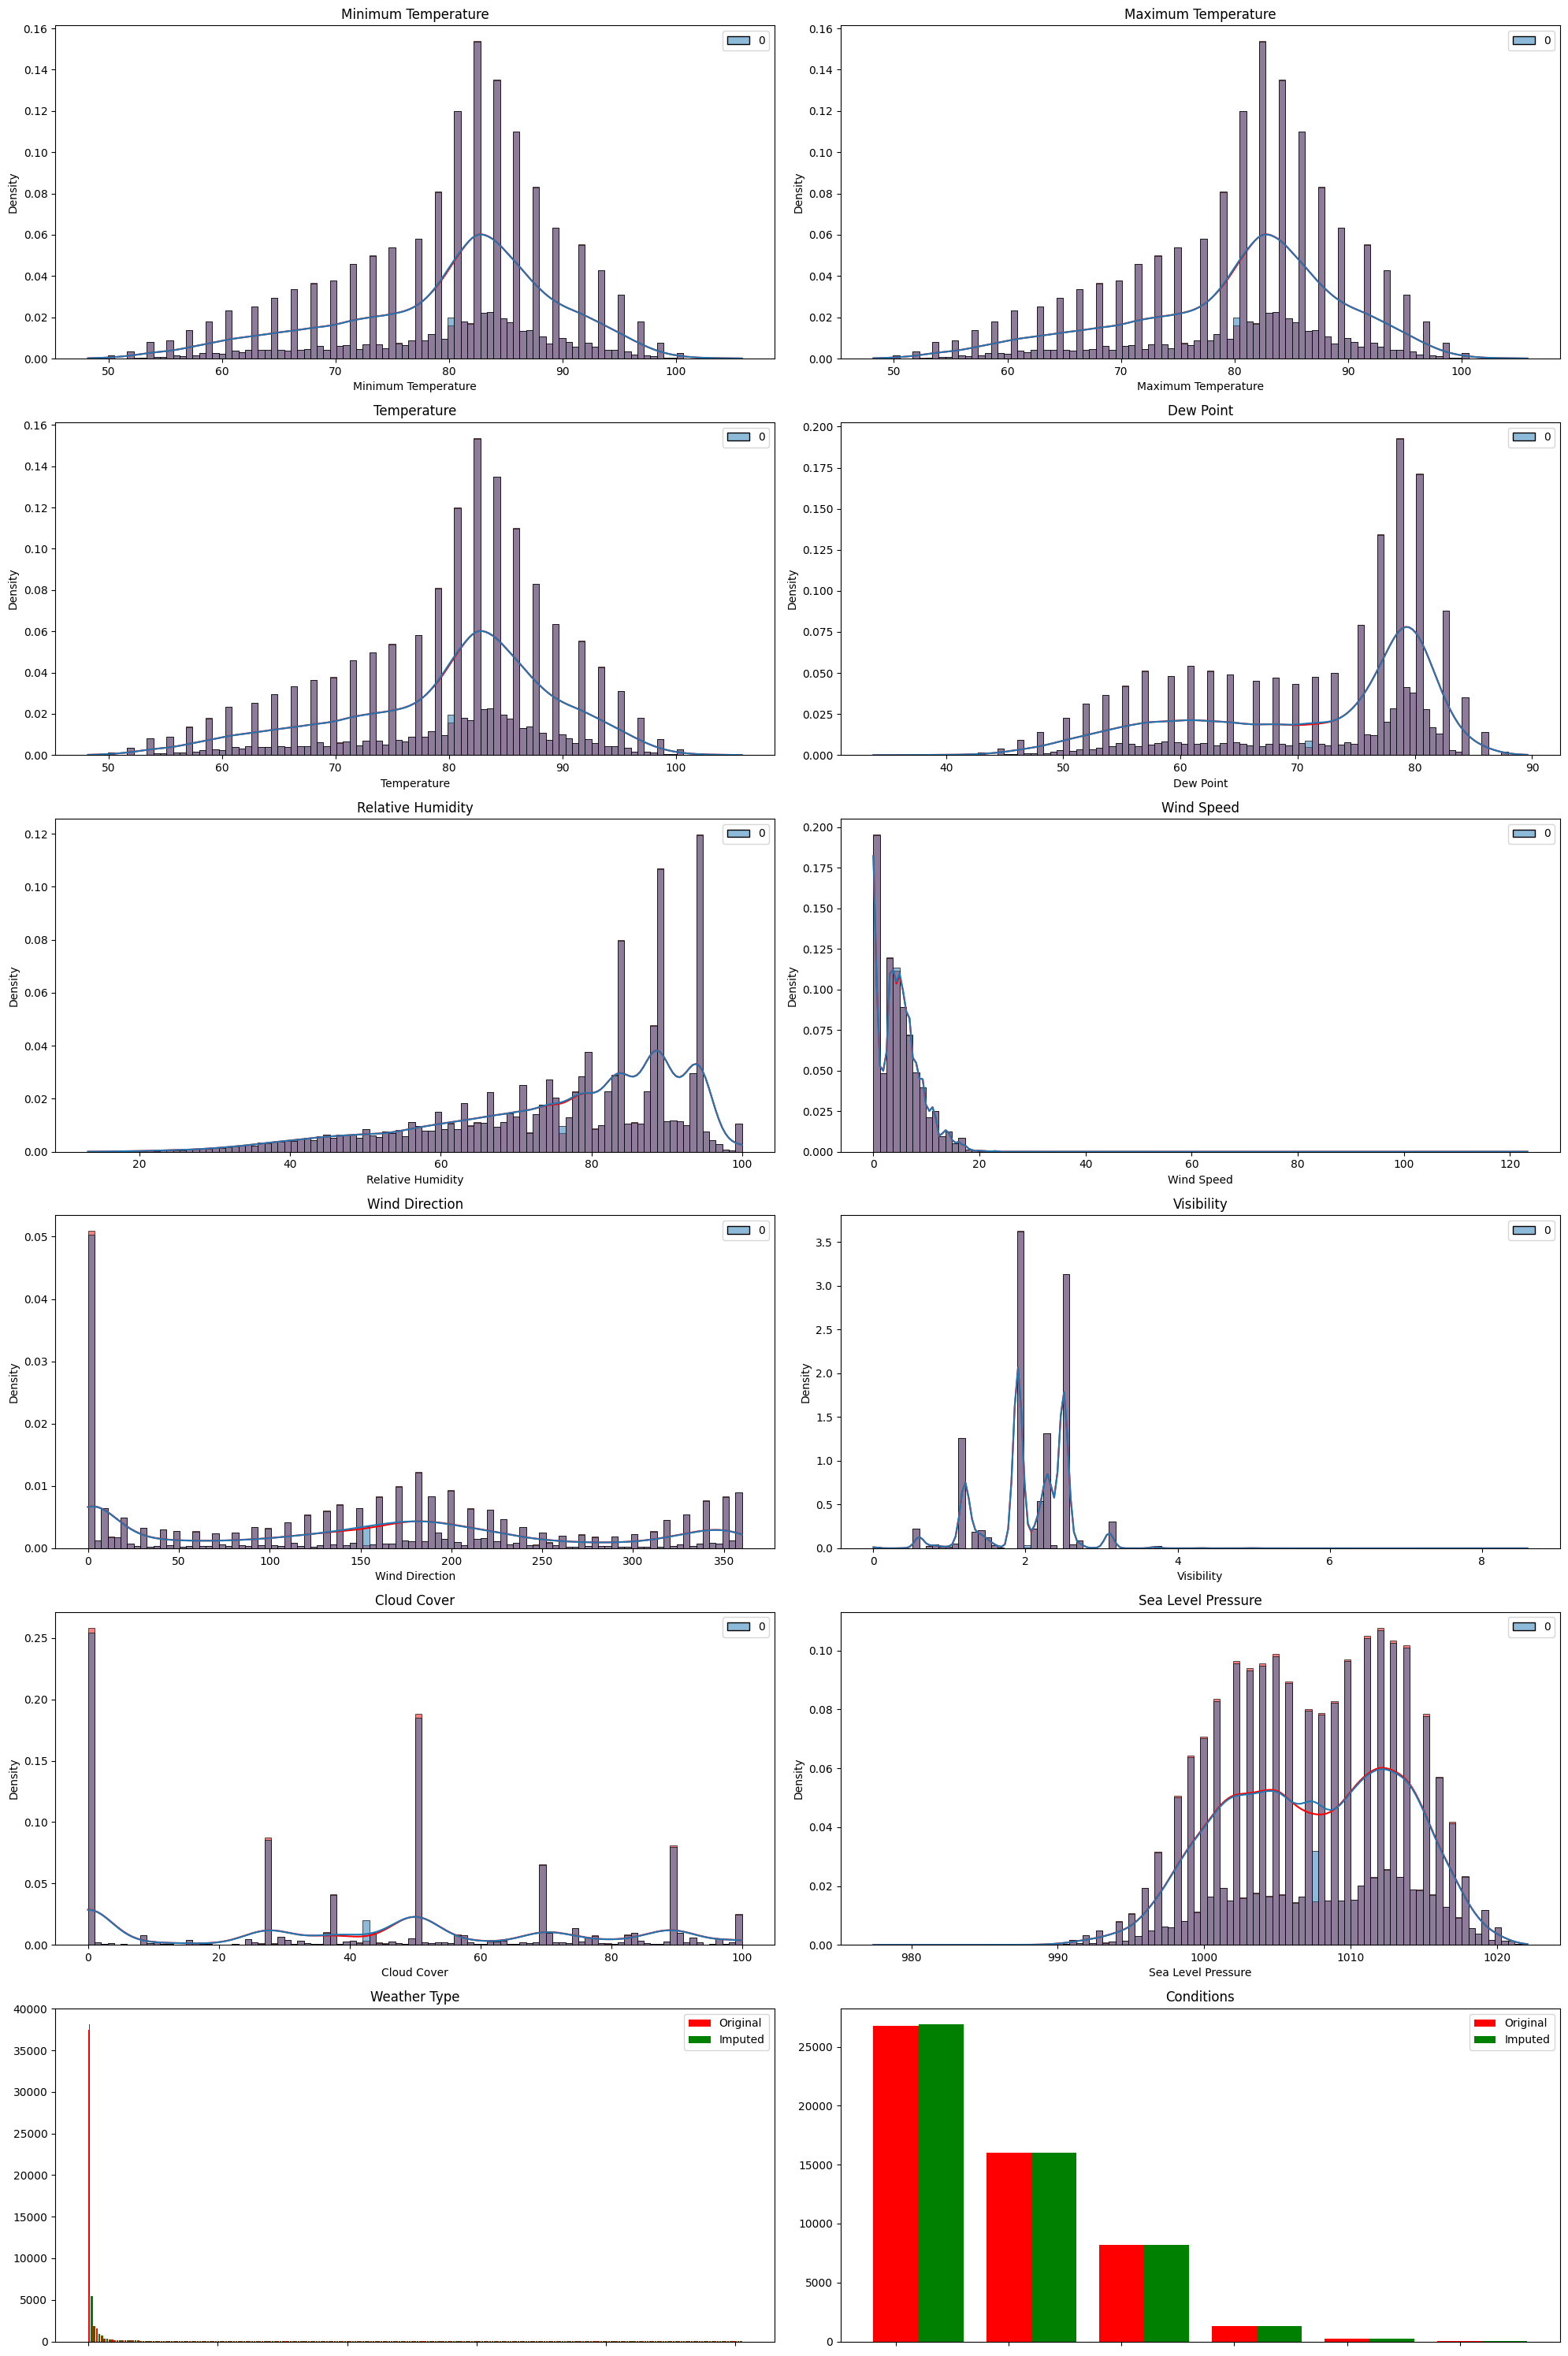

In [20]:
import math

plt_size = 0
i = 0
j = 0

for col in df.columns:
  if df[col].isnull().mean()*100 <= 5 and df[col].isnull().mean()*100 > 0:
    plt_size += 1


figure, axes = plt.subplots(plt_size//2, 2, figsize=(20,30))

for col in df.columns:

  if df[col].isnull().mean()*100 <= 5 and df[col].isnull().mean()*100 > 0:
        
    if df[col].dtype != 'O':

      axes[i, j].set_title(col)
      
      sns.histplot(df[col], bins=100, color='red', kde=True, ax=axes[i, j], stat='density')

      df[col] = imputer_num.fit_transform(df[[col]])

      sns.histplot(imputer_num.fit_transform(df[[col]]), bins=100, color='green', kde=True, ax=axes[i, j], stat='density')
    
    else:
      axes[i, j].set_title(col)
      
      category_counts1 = pd.Series(df[col].value_counts())
      category_counts2 = pd.DataFrame(imputer_cat.fit_transform(df[[col]])).value_counts()

      categories = category_counts1.index

      width = 0.4

      x_positions1 = range(len(category_counts1))
      x_positions2 = [x + width for x in x_positions1]

      axes[i, j].bar(x_positions1, category_counts1.values, width=width, color='red', label='Original')
      axes[i, j].bar(x_positions2, category_counts2.values, width=width, color='green', label='Imputed')

      axes[i, j].set_xticklabels([])

      axes[i, j].legend()

      plt.tight_layout()
      
      df[col] = imputer_cat.fit_transform(df[[col]])

    j += 1
    if j>1:
      j = 0
      i += 1

plt.show()

In [21]:
df.isnull().mean()*100

Address                 0.000000
Minimum Temperature     0.000000
Maximum Temperature     0.000000
Temperature             0.000000
Dew Point               0.000000
Relative Humidity       0.000000
Heat Index             39.442125
Wind Speed              0.000000
Wind Direction          0.000000
Precipitation           0.000000
Snow Depth             16.104364
Visibility              0.000000
Cloud Cover             0.000000
Sea Level Pressure      0.000000
Weather Type            0.000000
Latitude                0.000000
Longitude               0.000000
Resolved Address        0.000000
Name                    0.000000
Conditions              0.000000
Month                   0.000000
Hour                    0.000000
dtype: float64

In [22]:
df['Heat Index'].value_counts()

92.4     1275
94.1     1075
88.1     1071
98.3      986
96.1      920
         ... 
127.3       1
124.1       1
126.7       1
131.7       1
121.8       1
Name: Heat Index, Length: 483, dtype: int64

In [23]:
df['Snow Depth'].value_counts()

0.0    44213
Name: Snow Depth, dtype: int64

In [24]:
df = df.drop(['Snow Depth'], axis=1)

In [25]:
df.isnull().mean()*100

Address                 0.000000
Minimum Temperature     0.000000
Maximum Temperature     0.000000
Temperature             0.000000
Dew Point               0.000000
Relative Humidity       0.000000
Heat Index             39.442125
Wind Speed              0.000000
Wind Direction          0.000000
Precipitation           0.000000
Visibility              0.000000
Cloud Cover             0.000000
Sea Level Pressure      0.000000
Weather Type            0.000000
Latitude                0.000000
Longitude               0.000000
Resolved Address        0.000000
Name                    0.000000
Conditions              0.000000
Month                   0.000000
Hour                    0.000000
dtype: float64

In [26]:
df.head()

,Address,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions,Month,Hour
0,kolkata,62.6,62.6,62.6,59.0,88.01,NaN,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,0
1,kolkata,60.8,60.8,60.8,59.0,93.79,NaN,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,1
2,kolkata,63.1,63.1,63.1,60.4,90.99,NaN,0.0,0.0,0.0,0.6,0.0,1015.4,"Mist, Fog",22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,2
3,kolkata,60.8,60.8,60.8,59.0,93.79,NaN,5.8,20.0,0.0,0.6,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,3
4,kolkata,59.0,59.0,59.0,57.2,93.75,NaN,0.0,0.0,0.0,1.2,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",Clear,1,4


In [27]:
for col in df.columns:
  if(df[col].dtype == 'O'):
    print("//", col, "//")
    print(df[col].value_counts())
    print("\n\n----------------------------------------------------------------------   \n\n")

// Address //
kolkata    52700
Name: Address, dtype: int64


----------------------------------------------------------------------   


// Weather Type //
Smoke Or Haze                                                   38157
Mist                                                             5410
Light Rain                                                       1842
Mist, Smoke Or Haze                                              1532
Thunderstorm                                                      932
                                                                ...  
Mist, Rain, Sky Coverage Decreasing, Sky Coverage Increasing        1
Mist, Light Drizzle, Sky Coverage Decreasing                        1
Light Drizzle, Rain, Light Rain, Sky Coverage Increasing            1
Rain, Heavy Rain, Light Rain                                        1
Thunderstorm, Sky Unchanged                                         1
Name: Weather Type, Length: 253, dtype: int64


--------------------------

In [28]:
df = df.drop(['Address', 'Resolved Address', 'Name'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52700 entries, 0 to 52699
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Minimum Temperature  52700 non-null  float64
 1   Maximum Temperature  52700 non-null  float64
 2   Temperature          52700 non-null  float64
 3   Dew Point            52700 non-null  float64
 4   Relative Humidity    52700 non-null  float64
 5   Heat Index           31914 non-null  float64
 6   Wind Speed           52700 non-null  float64
 7   Wind Direction       52700 non-null  float64
 8   Precipitation        52700 non-null  float64
 9   Visibility           52700 non-null  float64
 10  Cloud Cover          52700 non-null  float64
 11  Sea Level Pressure   52700 non-null  float64
 12  Weather Type         52700 non-null  object 
 13  Latitude             52700 non-null  float64
 14  Longitude            52700 non-null  float64
 15  Conditions           52700 non-null 

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')

df['Heat Index'] = imputer.fit_transform(df[['Heat Index']])

In [31]:
df.isnull().mean()

Minimum Temperature    0.0
Maximum Temperature    0.0
Temperature            0.0
Dew Point              0.0
Relative Humidity      0.0
Heat Index             0.0
Wind Speed             0.0
Wind Direction         0.0
Precipitation          0.0
Visibility             0.0
Cloud Cover            0.0
Sea Level Pressure     0.0
Weather Type           0.0
Latitude               0.0
Longitude              0.0
Conditions             0.0
Month                  0.0
Hour                   0.0
dtype: float64

In [32]:
for col in df.columns:
  if(df[col].dtype != 'O'):
    print("//", col, "//")
    print(df[col].value_counts())
    print("\n\n----------------------------------------------------------------------   \n\n")

// Minimum Temperature //
82.4     3944
84.2     3533
80.6     3094
86.0     2845
87.8     2166
         ... 
100.7       1
53.2        1
52.6        1
100.3       1
99.3        1
Name: Minimum Temperature, Length: 501, dtype: int64


----------------------------------------------------------------------   


// Maximum Temperature //
82.4     3944
84.2     3533
80.6     3094
86.0     2845
87.8     2166
         ... 
100.7       1
53.2        1
52.6        1
100.3       1
99.3        1
Name: Maximum Temperature, Length: 501, dtype: int64


----------------------------------------------------------------------   


// Temperature //
82.4     3944
84.2     3533
80.6     3094
86.0     2845
87.8     2166
         ... 
100.7       1
53.2        1
52.6        1
100.3       1
99.3        1
Name: Temperature, Length: 501, dtype: int64


----------------------------------------------------------------------   


// Dew Point //
78.8    4961
80.6    4270
77.0    3452
82.4    2399
75.2    2016
  

In [33]:
df = df.drop(['Precipitation', 'Latitude', 'Longitude'], axis=1)

In [34]:
df.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions,Month,Hour
0,62.6,62.6,62.6,59.0,88.01,98.187579,0.0,0.0,1.2,0.0,1015.0,Mist,Clear,1,0
1,60.8,60.8,60.8,59.0,93.79,98.187579,0.0,0.0,1.2,0.0,1015.0,Mist,Clear,1,1
2,63.1,63.1,63.1,60.4,90.99,98.187579,0.0,0.0,0.6,0.0,1015.4,"Mist, Fog",Clear,1,2
3,60.8,60.8,60.8,59.0,93.79,98.187579,5.8,20.0,0.6,0.0,1014.0,Mist,Clear,1,3
4,59.0,59.0,59.0,57.2,93.75,98.187579,0.0,0.0,1.2,0.0,1014.0,Mist,Clear,1,4


In [35]:
df['Weather Type'] = df['Weather Type'].map(lambda x : x.split(", "))

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

transformed_data = mlb.fit_transform(df['Weather Type'])

transformed_df = pd.DataFrame(transformed_data, columns=mlb.classes_)

In [37]:
df.shape, transformed_df.shape

((52700, 15), (52700, 19))

In [38]:
transformed_df.head()

,Drizzle,Dust storm,Fog,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Lightning Without Thunder,Mist,Precipitation In Vicinity,Rain,Rain Showers,Sky Coverage Decreasing,Sky Coverage Increasing,Sky Unchanged,Smoke Or Haze,Snow And Rain Showers,Thunderstorm,Thunderstorm Without Precipitation
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
df = df.merge(transformed_df, left_index=True, right_index=True)

In [40]:
df = df.drop('Weather Type', axis=1)

In [41]:
df.isnull().mean()

Minimum Temperature                   0.0
Maximum Temperature                   0.0
Temperature                           0.0
Dew Point                             0.0
Relative Humidity                     0.0
Heat Index                            0.0
Wind Speed                            0.0
Wind Direction                        0.0
Visibility                            0.0
Cloud Cover                           0.0
Sea Level Pressure                    0.0
Conditions                            0.0
Month                                 0.0
Hour                                  0.0
Drizzle                               0.0
Dust storm                            0.0
Fog                                   0.0
Heavy Rain                            0.0
Light Drizzle                         0.0
Light Rain                            0.0
Light Snow                            0.0
Lightning Without Thunder             0.0
Mist                                  0.0
Precipitation In Vicinity         

In [42]:
df.isna().mean()

Minimum Temperature                   0.0
Maximum Temperature                   0.0
Temperature                           0.0
Dew Point                             0.0
Relative Humidity                     0.0
Heat Index                            0.0
Wind Speed                            0.0
Wind Direction                        0.0
Visibility                            0.0
Cloud Cover                           0.0
Sea Level Pressure                    0.0
Conditions                            0.0
Month                                 0.0
Hour                                  0.0
Drizzle                               0.0
Dust storm                            0.0
Fog                                   0.0
Heavy Rain                            0.0
Light Drizzle                         0.0
Light Rain                            0.0
Light Snow                            0.0
Lightning Without Thunder             0.0
Mist                                  0.0
Precipitation In Vicinity         

In [43]:
df.duplicated().sum()

547

In [44]:
df = df.drop_duplicates()

In [45]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Conditions', axis=1), df['Conditions'], test_size=0.2, random_state=100)

In [174]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41722, 32), (10431, 32), (41722,), (10431,))

In [175]:
X_train.head(3)

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Sea Level Pressure,Month,Hour,Drizzle,Dust storm,Fog,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Lightning Without Thunder,Mist,Precipitation In Vicinity,Rain,Rain Showers,Sky Coverage Decreasing,Sky Coverage Increasing,Sky Unchanged,Smoke Or Haze,Snow And Rain Showers,Thunderstorm,Thunderstorm Without Precipitation
6083,84.2,84.2,84.2,78.8,83.90,96.1,5.8,170.0,2.5,37.3,1007.0,9,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4734,87.9,87.9,87.9,77.4,71.36,100.6,3.0,146.0,2.5,18.4,999.2,7,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21926,89.6,89.6,89.6,82.4,79.47,111.4,10.3,90.0,2.5,37.3,993.0,7,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [176]:
y_train.head(3)

6083     Partially cloudy
4734                Clear
21926    Partially cloudy
Name: Conditions, dtype: object

In [177]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

In [178]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [180]:
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

In [54]:
y_train[:10]

array([2, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [55]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

In [56]:
explained_variance_ratio = pca.explained_variance_ratio_

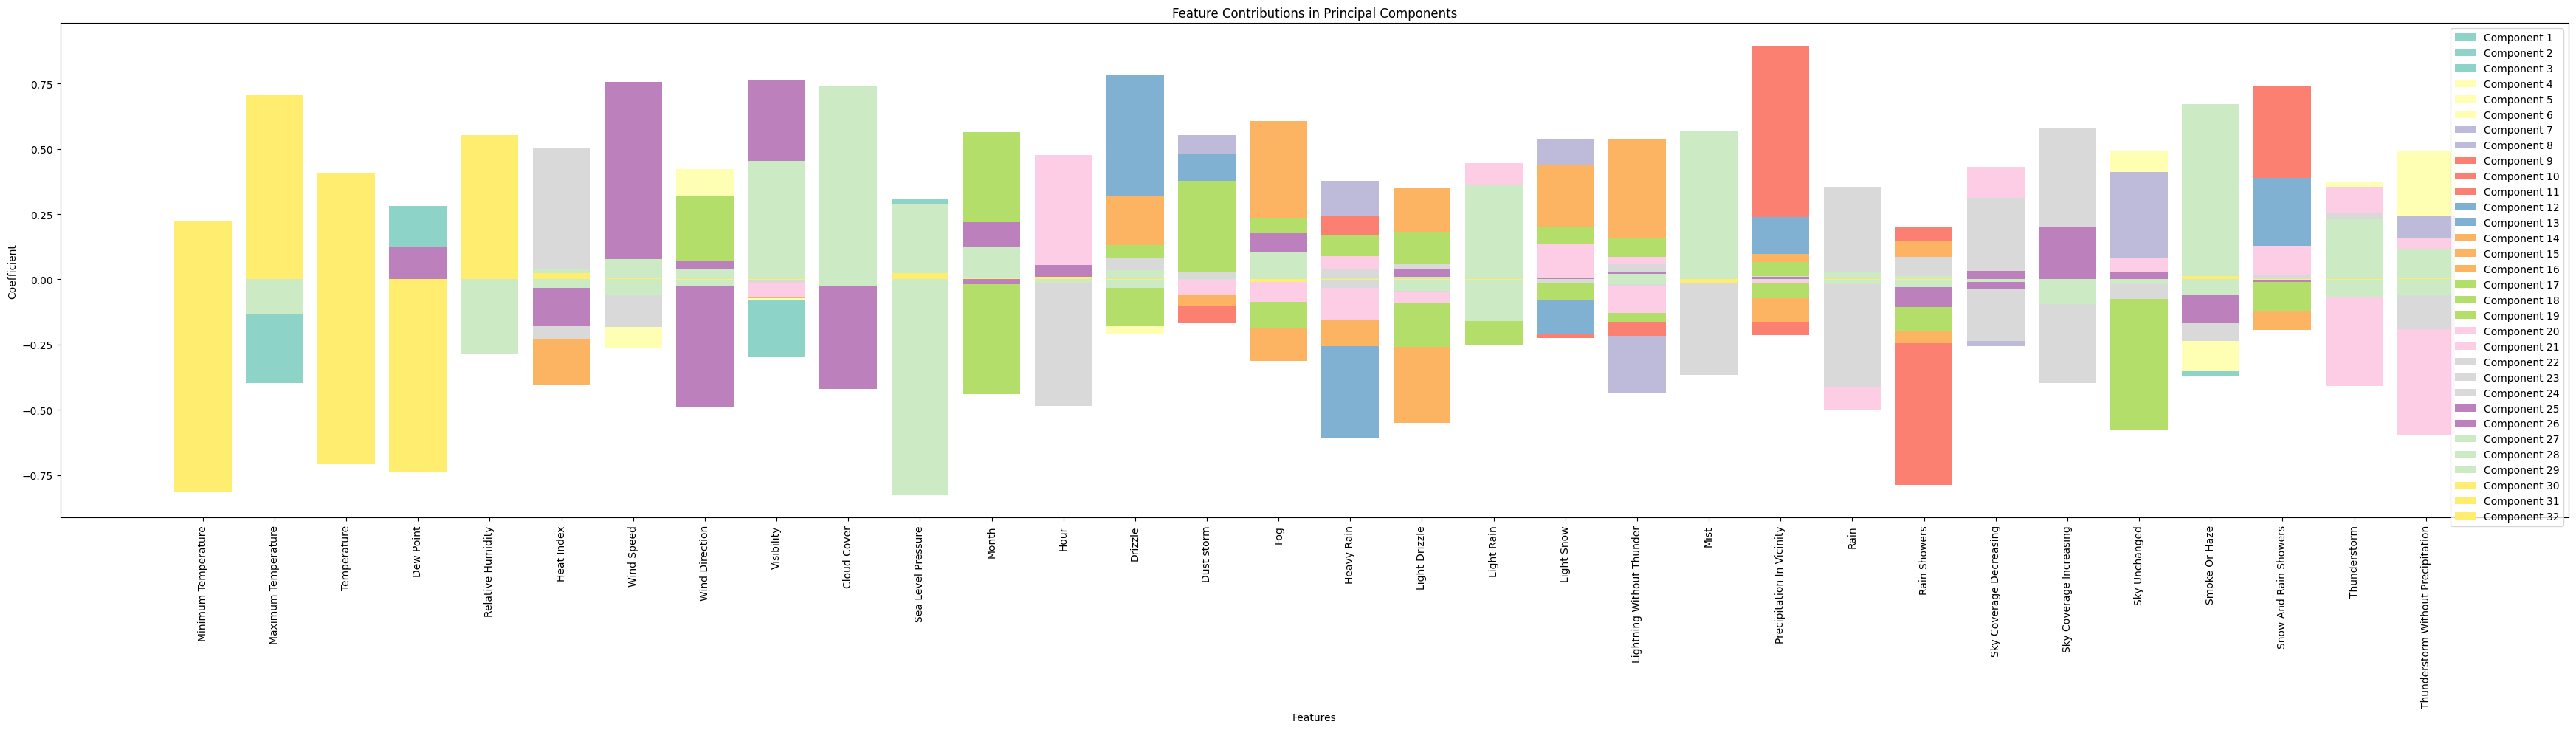

In [57]:
plt.figure(figsize=(35, 10))

components = pca.components_
component_names = [f'Component {i+1}' for i in range(len(components))]
feature_names = df.drop('Conditions', axis=1).columns


colors = plt.cm.Set3(np.linspace(0, 1, len(component_names)))

for i, component in enumerate(components):
    plt.bar(feature_names, component, color=colors[i], label=component_names[i])

plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Contributions in Principal Components')
plt.xticks(rotation=90)
plt.legend(loc='best')

plt.tight_layout()
plt.show()


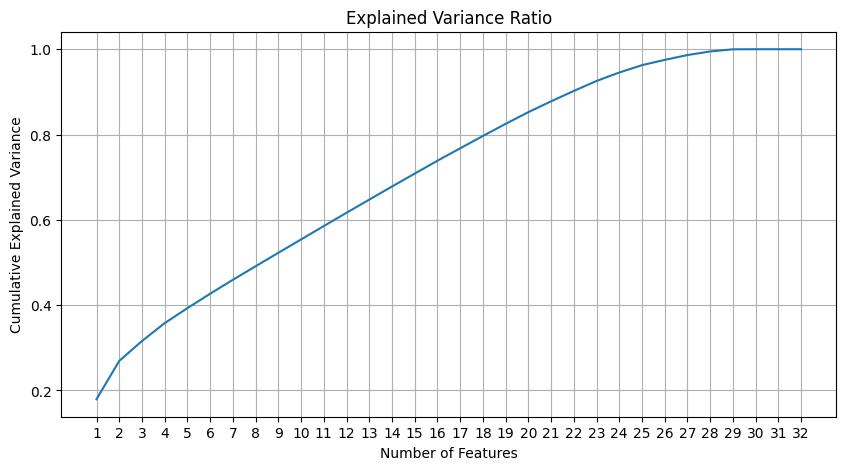

In [58]:
num_features = X_train.shape[1]
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_features + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.xticks(np.arange(1, num_features + 1, 1)) 
plt.grid(True)
plt.show()

In [59]:
pca = PCA(25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [60]:
X_train_pca.shape, X_test_pca.shape

((41722, 25), (10431, 25))

#KNN

In [61]:
X_train.shape, y_train.shape

((41722, 32), (41722,))

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [63]:
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [64]:
y_pred_knn = knn_model.predict(X_test_pca)

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn)*100)

82.44655354232576


In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)

In [67]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [68]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [69]:
print(best_params, " : ", best_score)

{'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}  :  0.8213891462786231


In [70]:
best_model = grid_search.best_estimator_
y_pred_knn_gscv = best_model.predict(X_test_pca)

In [73]:
print(accuracy_score(y_test, y_pred_knn_gscv)*100)

83.09845652382322


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid_search, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

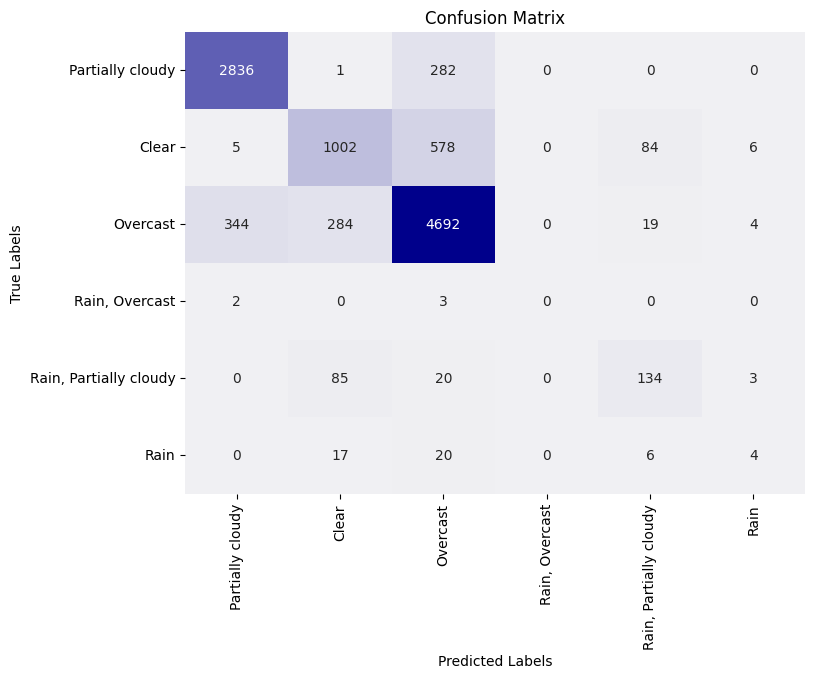

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn_gscv)

cmap = sns.color_palette("Blues", as_cmap=True)
log_norm = plt.Normalize(vmin=np.min(cm), vmax=np.max(cm))
log_cmap = sns.light_palette("darkblue", as_cmap=True)

plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt="d", cmap=log_cmap, norm=log_norm, cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(df['Conditions'].value_counts().index)
ax.yaxis.set_ticklabels(df['Conditions'].value_counts().index)


plt.show()

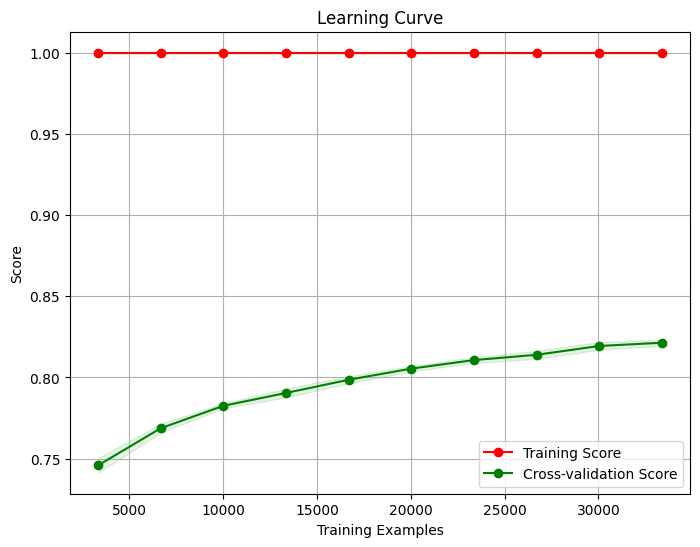

In [75]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_pca, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculating the mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Ploting the learning curve
plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

#Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [77]:
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier()

In [78]:
y_pred_rf = rf_model.predict(X_test_pca)

In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf)*100)

86.83731185888219


In [80]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV( , param_grid, cv=5)

In [81]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [82]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [83]:
print(best_params, " : ", best_score)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}  :  0.8600978103330312


In [85]:
best_model = grid_search.best_estimator_
y_pred_rf_gscv = best_model.predict(X_test_pca)

In [86]:
print(accuracy_score(y_test, y_pred_rf_gscv)*100)

87.14408973252804


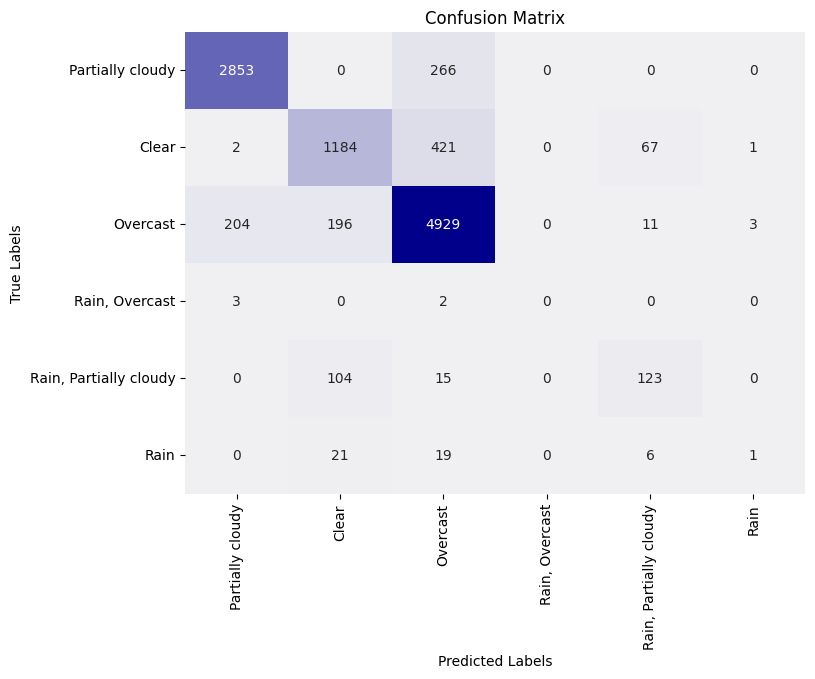

In [87]:
cm = confusion_matrix(y_test, y_pred_rf_gscv)

cmap = sns.color_palette("Blues", as_cmap=True)
log_norm = plt.Normalize(vmin=np.min(cm), vmax=np.max(cm))
log_cmap = sns.light_palette("darkblue", as_cmap=True)

plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt="d", cmap=log_cmap, norm=log_norm, cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(df['Conditions'].value_counts().index)
ax.yaxis.set_ticklabels(df['Conditions'].value_counts().index)


plt.show()

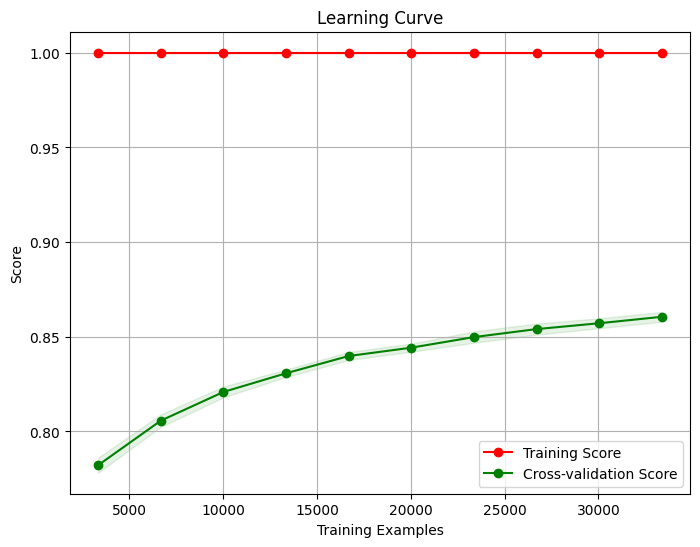

In [88]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_pca, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculating the mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Ploting the learning curve
plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

#SVM

In [89]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

svm_model = SVC()

In [90]:
svm_model.fit(X_train, y_train)

SVC()

In [91]:
y_pred_svm = svm_model.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9480394976512319


In [93]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

In [94]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [95]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [96]:
print(best_params, " : ", best_score)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}  :  0.9506735019678108


In [97]:
best_model = grid_search.best_estimator_
y_pred_svm_gscv = best_model.predict(X_test)

In [98]:
print(accuracy_score(y_test, y_pred_svm_gscv)*100)

95.18742210718052


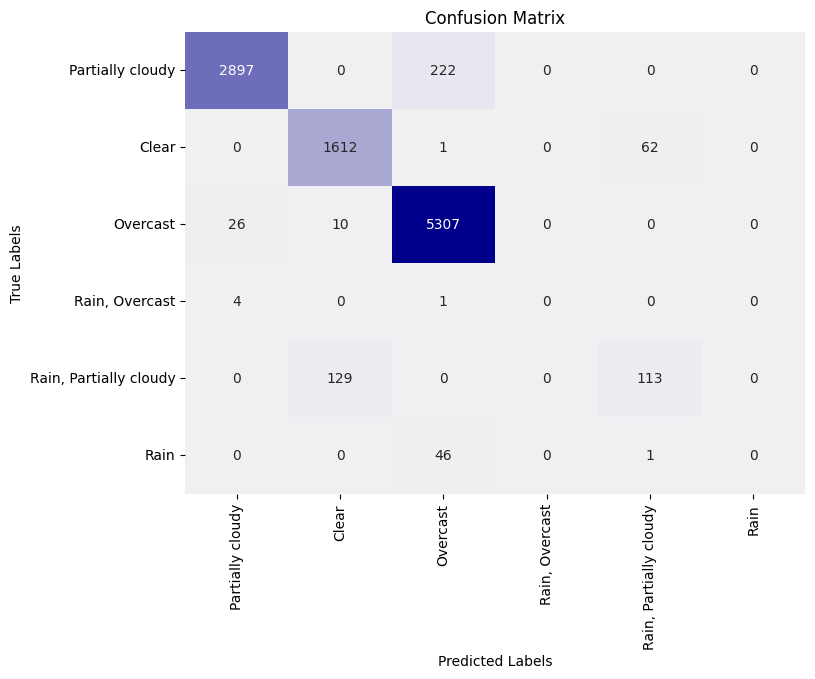

In [99]:
cm = confusion_matrix(y_test, y_pred_svm_gscv)

cmap = sns.color_palette("Blues", as_cmap=True)
log_norm = plt.Normalize(vmin=np.min(cm), vmax=np.max(cm))
log_cmap = sns.light_palette("darkblue", as_cmap=True)

plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt="d", cmap=log_cmap, norm=log_norm, cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(df['Conditions'].value_counts().index)
ax.yaxis.set_ticklabels(df['Conditions'].value_counts().index)


plt.show()

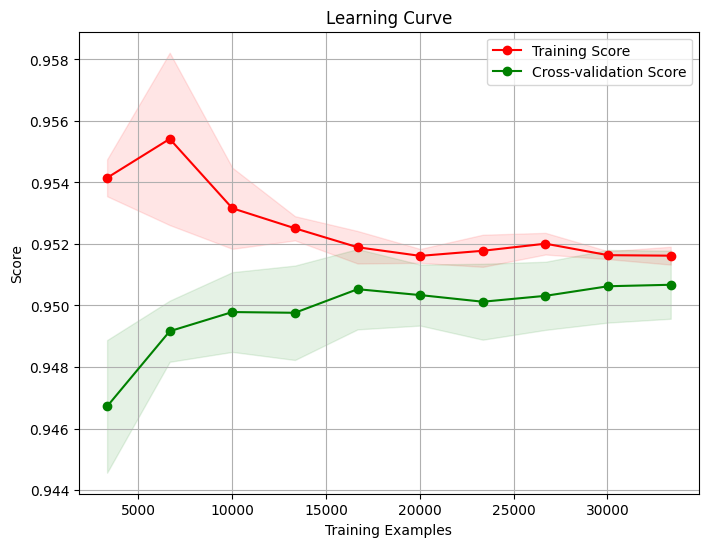

In [100]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculating the mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Ploting the learning curve
plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

#ANN

In [181]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=100)

In [182]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape, X_val.shape, y_val.shape

((41722, 32), (41722,), (5215, 32), (5215,), (5216, 32), (5216,))

In [192]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

In [205]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape, X_val.shape, y_val.shape

((41722, 32), (41722, 1), (5215, 32), (5215, 1), (5216, 32), (5216, 1))

In [260]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

In [223]:
def build_model():
  model = Sequential()
  model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(len(np.unique(y_train)), activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [224]:
model = build_model()

In [225]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [226]:
model_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=early_stopping)

Epoch 1/100
1304/1304 [==============================] - 3s 2ms/step - loss: 0.5998 - accuracy: 0.7876 - val_loss: 0.2961 - val_accuracy: 0.9091
Epoch 2/100
1304/1304 [==============================] - 2s 1ms/step - loss: 0.2405 - accuracy: 0.9241 - val_loss: 0.2108 - val_accuracy: 0.9333
Epoch 3/100
1304/1304 [==============================] - 2s 1ms/step - loss: 0.1949 - accuracy: 0.9361 - val_loss: 0.1863 - val_accuracy: 0.9365
Epoch 4/100
1304/1304 [==============================] - 2s 1ms/step - loss: 0.1754 - accuracy: 0.9408 - val_loss: 0.1775 - val_accuracy: 0.9411
Epoch 5/100
1304/1304 [==============================] - 2s 2ms/step - loss: 0.1616 - accuracy: 0.9454 - val_loss: 0.1610 - val_accuracy: 0.9448
Epoch 6/100
1304/1304 [==============================] - 2s 1ms/step - loss: 0.1487 - accuracy: 0.9482 - val_loss: 0.1516 - val_accuracy: 0.9473
Epoch 7/100
1304/1304 [==============================] - 2s 1ms/step - loss: 0.1409 - accuracy: 0.9494 - val_loss: 0.1429 - val_ac

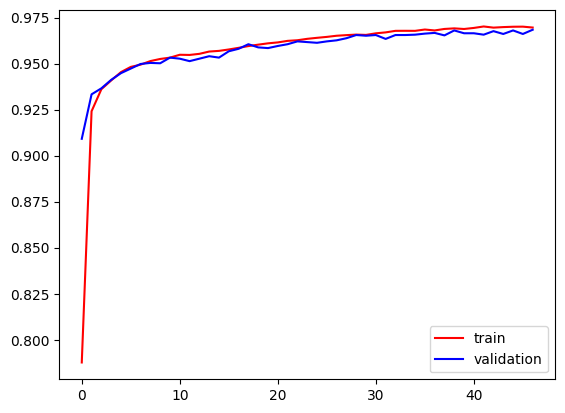

In [227]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], color='red', label='train')
plt.plot(model_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

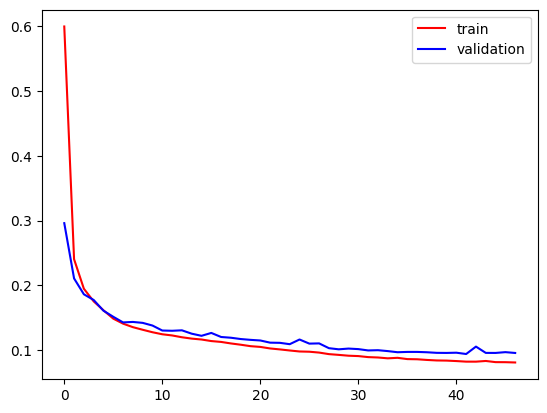

In [228]:
plt.plot(model_history.history['loss'], color='red', label='train')
plt.plot(model_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [229]:
y_pred_nn = model.predict(X_test)

163/163 [==============================] - 1s 3ms/step


In [235]:
y_pred_nn = np.argmax(y_pred_nn, axis=1)

In [236]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_nn)*100)

97.08533077660594


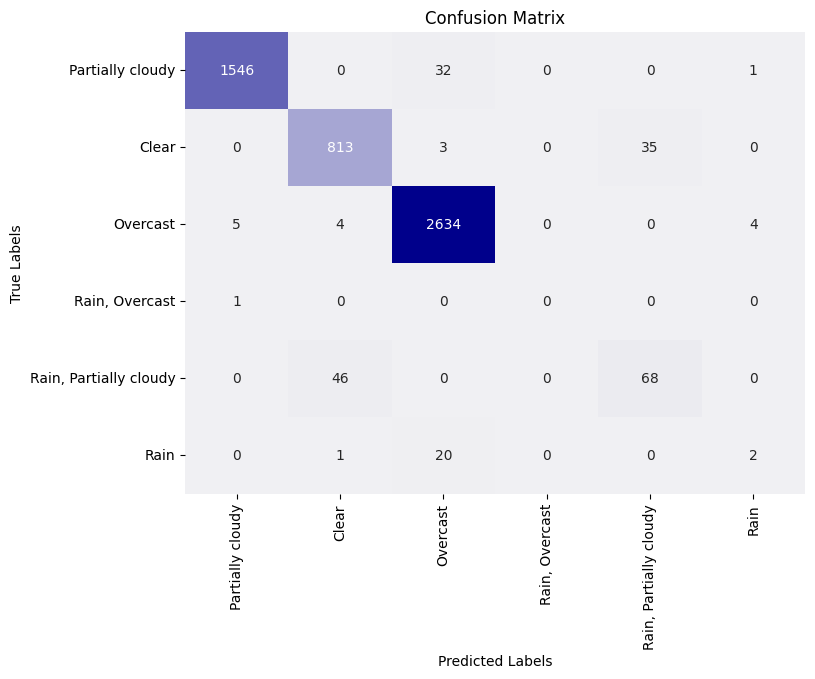

In [238]:
cm = confusion_matrix(y_test, y_pred_nn)

cmap = sns.color_palette("Blues", as_cmap=True)
log_norm = plt.Normalize(vmin=np.min(cm), vmax=np.max(cm))
log_cmap = sns.light_palette("darkblue", as_cmap=True)

plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt="d", cmap=log_cmap, norm=log_norm, cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(df['Conditions'].value_counts().index)
ax.yaxis.set_ticklabels(df['Conditions'].value_counts().index)


plt.show()

Hyperparameter Tuning

In [246]:
%%capture
pip install keras-tuner --upgrade

In [249]:
import keras_tuner
from tensorflow import keras

In [274]:
def build_model(hp):
    model = Sequential()

    model.add(Input(shape=(X_train.shape[1],)))

    for i in range(hp.Int("Layers", min_value=1, max_value=10, step=3)):
        model.add(Dense(units=hp.Int(f"Nodes_{i}", min_value=16, max_value=64, step=8), activation='relu'))

    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [275]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=25,
    directory='project_dir', 
    project_name='v2')

In [276]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

Trial 25 Complete [00h 00m 12s]
val_loss: 0.1370173543691635

Best val_loss So Far: 0.09852717071771622
Total elapsed time: 00h 07m 12s


In [277]:
tuner.get_best_hyperparameters()[0].values

{'Layers': 4,
 'Nodes_0': 64,
 'Nodes_1': 24,
 'Nodes_2': 56,
 'Nodes_3': 32,
 'Nodes_4': 56,
 'Nodes_5': 40,
 'Nodes_6': 48,
 'Nodes_7': 40,
 'Nodes_8': 16,
 'Nodes_9': 24}

In [278]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [279]:
model_history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), initial_epoch=5, epochs=100, callbacks=early_stopping)

Epoch 6/100
1304/1304 [==============================] - 4s 2ms/step - loss: 0.0996 - accuracy: 0.9628 - val_loss: 0.1067 - val_accuracy: 0.9549
Epoch 7/100
1304/1304 [==============================] - 3s 2ms/step - loss: 0.0946 - accuracy: 0.9640 - val_loss: 0.0982 - val_accuracy: 0.9643
Epoch 8/100
1304/1304 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9646 - val_loss: 0.0995 - val_accuracy: 0.9613
Epoch 9/100
1304/1304 [==============================] - 2s 2ms/step - loss: 0.0902 - accuracy: 0.9661 - val_loss: 0.0962 - val_accuracy: 0.9651
Epoch 10/100
1304/1304 [==============================] - 2s 2ms/step - loss: 0.0899 - accuracy: 0.9664 - val_loss: 0.0952 - val_accuracy: 0.9651
Epoch 11/100
1304/1304 [==============================] - 2s 2ms/step - loss: 0.0865 - accuracy: 0.9667 - val_loss: 0.0964 - val_accuracy: 0.9618
Epoch 12/100
1304/1304 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9675 - val_loss: 0.0961 - val

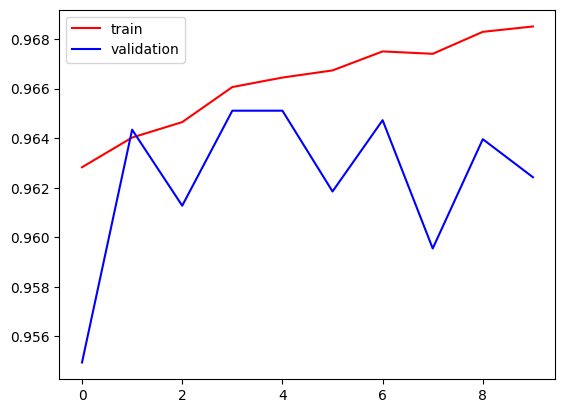

In [280]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], color='red', label='train')
plt.plot(model_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

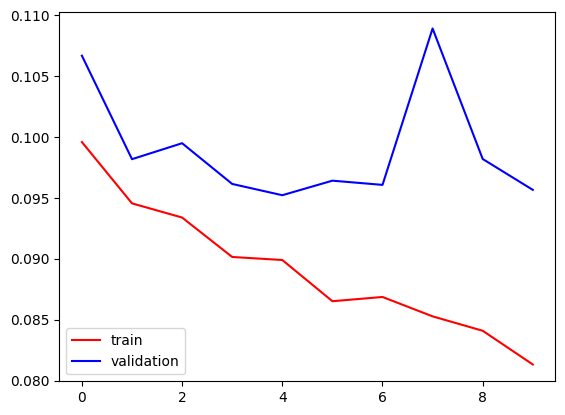

In [281]:
plt.plot(model_history.history['loss'], color='red', label='train')
plt.plot(model_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [282]:
y_pred_nn = best_model.predict(X_test)

163/163 [==============================] - 0s 1ms/step


In [283]:
y_pred_nn = np.argmax(y_pred_nn, axis=1)

In [284]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_nn)*100)

96.81687440076702


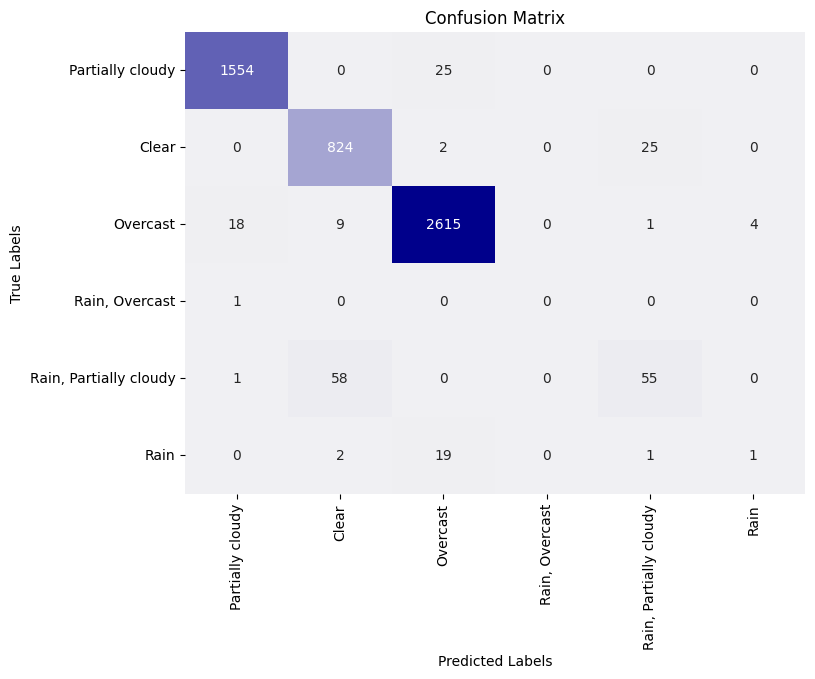

In [285]:
cm = confusion_matrix(y_test, y_pred_nn)

cmap = sns.color_palette("Blues", as_cmap=True)
log_norm = plt.Normalize(vmin=np.min(cm), vmax=np.max(cm))
log_cmap = sns.light_palette("darkblue", as_cmap=True)

plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt="d", cmap=log_cmap, norm=log_norm, cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(df['Conditions'].value_counts().index)
ax.yaxis.set_ticklabels(df['Conditions'].value_counts().index)


plt.show()

In [286]:
category_counts = df['Conditions'].value_counts()

# Calculate the percentage of each category
category_percentages = (category_counts / len(df)) * 100

# Print the result
print(category_percentages)

Partially cloudy          51.226200
Clear                     30.028953
Overcast                  15.732556
Rain, Overcast             2.521427
Rain, Partially cloudy     0.469772
Rain                       0.021092
Name: Conditions, dtype: float64
